In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = load_wine()

In [4]:
df = pd.DataFrame(data['data'],
                  columns = data['feature_names'])

df['target'] = data['target']
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], random_state=42, test_size=0.2)

model = KNeighborsClassifier(n_neighbors=5)

In [6]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
y_pred = model.predict(X_test)
y_pred

array([2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0])

In [8]:
model.score(X_test, y_test)

0.7222222222222222

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



In [10]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  2],
       [ 0, 11,  3],
       [ 2,  3,  3]], dtype=int64)

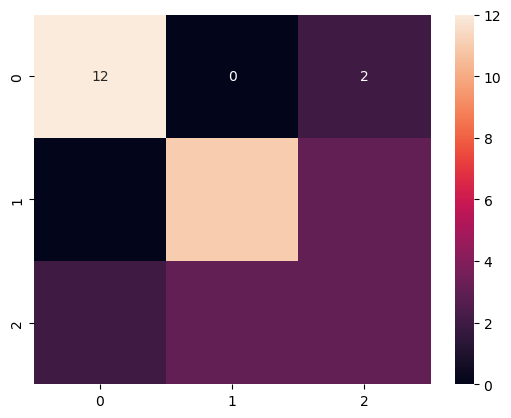

In [11]:
sns.heatmap(cm, annot=True, fmt = '.2g')
plt.show()

In [12]:
import time
max_score = 0
all_score = []
all_k = []

for i in range(1,16):
    X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], random_state=32, test_size=0.2)
    
    model = KNeighborsClassifier(n_neighbors=i)
    
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    if score>max_score:
        max_score = score

        
        print(f'Value of K is: {i} and Score is {score}')
        display(clear=True)
    all_score.append(score) 
    all_k.append(i)
    time.sleep(1)

Value of K is: 6 and Score is 0.8333333333333334


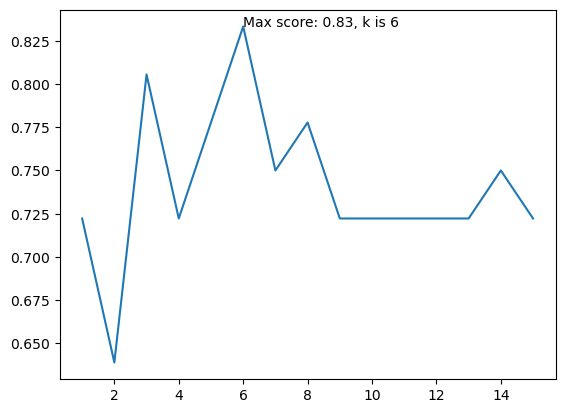

In [13]:
plt.plot(range(1,16), all_score)

k_index = np.argmax(all_score)

plt.annotate(text = f'Max score: {round(max(all_score), 2)}, k is {k_index+1}', 
            xy = (k_index+1,max(all_score)))
plt.show()